In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import GridSearchCV

## Random Forrest Modelling

### Initial Model

In [99]:
train_test_data = pd.read_csv('../../../data/train_test_data/train_test_data.csv')

In [100]:
train_test_data.dropna(inplace=True)
train_test_data

,timestamp,rank,ticker,name,mentions,mentioning_users,upvotes,sentiment,rank_24h_ago,mentions_24h_ago,...,return_on_equity_ttm,dividend_yield_annual,total_debt_to_equity_quarterly,revenue_growth_ttm_yoy,dividend_exists,rank_percentage_change_24h,mentions_percentage_change_24h,opening_price,closing_price,label
0,06-18-2023,2,AMD,AMD,56,42.0,112,67.0,4,54,...,2.4000,0.000000,0.0451,22.20,0,-0.500000,0.037037,125.82,120.08,0
1,06-18-2023,3,TSLA,Tesla,48,45.0,462,51.0,3,61,...,27.9000,0.000000,0.0557,38.34,0,0.000000,-0.213115,258.92,260.54,1
2,06-18-2023,4,NVDA,NVIDIA,44,41.0,262,57.0,2,88,...,20.8800,0.037512,0.4467,-12.40,1,1.000000,-0.500000,434.50,426.92,0
4,06-18-2023,7,AAPL,Apple,32,30.0,226,70.0,10,20,...,165.7200,0.516101,1.7635,-0.24,1,-0.300000,0.600000,186.73,184.92,0
5,06-18-2023,9,DTE,DTE Energy,23,22.0,146,56.0,6,44,...,11.7500,3.344746,1.8338,-15.52,1,0.500000,-0.477273,114.56,114.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,06-16-2023,7,PLTR,Palantir,184,84.0,588,65.0,12,53,...,-7.1566,0.000000,0.0000,20.50,0,-0.416667,2.471698,16.87,16.30,0
196,06-16-2023,8,MSFT,Microsoft,126,82.0,613,73.0,24,35,...,38.4600,0.781385,0.3322,7.81,1,-0.666667,2.600000,351.32,342.33,0
197,06-16-2023,9,SPCE,Virgin Galactic,125,99.0,739,68.0,164,3,...,1.8000,0.000000,1.1349,-33.95,0,-0.945122,40.666667,5.72,4.73,0
198,06-16-2023,10,NKLA,Nikola,117,79.0,285,75.0,10,56,...,1.1500,0.000000,0.5830,3082.56,0,0.000000,1.089286,1.70,1.19,0


In [101]:
# Remove columns that are not needed for modelling

train_test_data = train_test_data.drop(
    ['name', 
     'ticker', 
     'timestamp',
    'opening_price',
   'closing_price',
   'rank_24h_ago',
   'mentions_24h_ago',
   'rank', 'dividend_exists'
    ], axis=1).sort_values(
    by=['mentions'], 
    ascending=False)

In [102]:
train_test_data

,mentions,mentioning_users,upvotes,sentiment,beta,earnings_per_share_ttm,price_to_equity_ttm,return_on_equity_ttm,dividend_yield_annual,total_debt_to_equity_quarterly,revenue_growth_ttm_yoy,rank_percentage_change_24h,mentions_percentage_change_24h,label
30,3216,1370.0,30860,57.0,1.770654,1.7415,173.5333,18.66000,0.052394,0.4956,0.22,-0.666667,10.694545,0
77,1684,1076.0,10793,68.0,2.890432,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.60,0.000000,1.284939,0
80,1401,856.0,8556,59.0,2.890432,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.60,0.000000,-0.170515,1
31,1363,889.0,8328,68.0,2.707838,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.60,1.000000,3.168196,0
48,1268,738.0,24699,61.0,1.770654,1.7415,214.7679,18.66000,0.042127,0.4956,0.22,0.000000,-0.584262,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,21,21.0,71,27.0,1.572032,3.0917,6.2354,67.06000,2.949852,2.9535,-1.62,-0.142857,0.615385,0
51,20,19.0,81,100.0,1.590526,39.3679,14.3787,36.27000,1.987601,0.2909,32.95,-0.500000,0.538462,1
7,20,21.0,317,71.0,1.137865,9.2258,37.5006,38.46000,0.781385,0.3322,7.81,-0.388889,0.250000,0
8,19,20.0,22,67.0,1.225190,2.2551,41.2108,4.32000,0.000000,0.4958,13.52,-0.076923,0.117647,0


In [103]:
train_test_data.value_counts('label')

label
1    104
0     92
Name: count, dtype: int64

In [104]:
x_train, x_test, y_train, y_test = train_test_split(train_test_data.drop('label', axis=1), train_test_data['label'], test_size=0.2, random_state=42)

In [105]:
clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0)

In [106]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, random_state=0)

In [107]:
clf.score(x_test, y_test)

0.45

In [108]:
clf.score(x_train, y_train)

0.9935897435897436

### Hyper-parameter tuning

In [109]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [6, 8, 10, 12],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
grid_search.best_params_
clf = grid_search.best_estimator_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [110]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [120]:
random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None,
 'bootstrap': False}

In [111]:
grid_search.best_score_

0.5576923076923077

In [112]:
grid_search.score(x_test, y_test)

0.475

In [117]:
# random search cv

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                   n_iter=100, cv=3, verbose=2, random_state=42,
                                   n_jobs=-1)
random_search.fit(x_train, y_train)
random_search.best_params_
clf = random_search.best_estimator_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


0.475

In [118]:
random_search.best_score_

0.6217948717948718

In [119]:
clf.score(x_test, y_test)

0.475

In [113]:
len(x_test)

40

### Visuallizing feature importance

In [114]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance', ascending=False)

In [115]:
feature_importances

,importance
rank_percentage_change_24h,0.120058
mentions_percentage_change_24h,0.103695
mentions,0.097361
mentioning_users,0.096011
revenue_growth_ttm_yoy,0.083421
sentiment,0.082564
upvotes,0.081763
price_to_equity_ttm,0.073560
beta,0.067531
earnings_per_share_ttm,0.064097


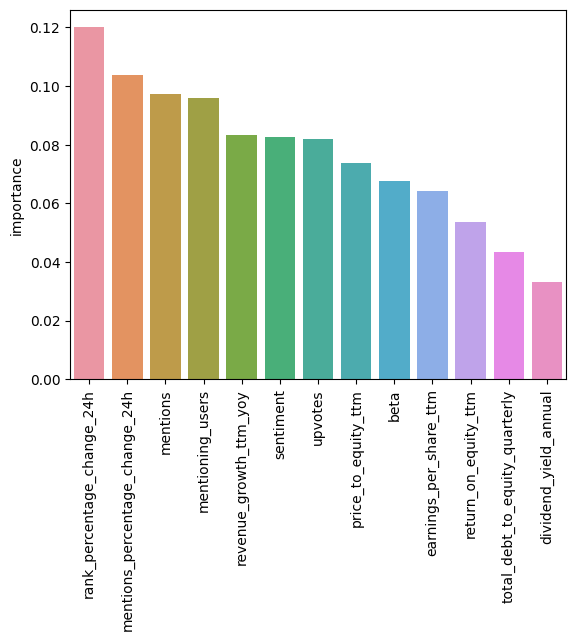

In [116]:
# visualize the most important features
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=90)
plt.show()